In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing as sk_preprocessing
from sklearn.model_selection import train_test_split

import sys
from sklearn.preprocessing import StandardScaler
sys.setrecursionlimit(100000)

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
poker_hand = fetch_ucirepo(id=158)

# data (as pandas dataframes)
X = poker_hand.data.features
Y = poker_hand.data.targets

# metadata
print(poker_hand.metadata)

# variable information
print(poker_hand.variables)

DF = pd.concat([X, Y], axis=1)

{'uci_id': 158, 'name': 'Poker Hand', 'repository_url': 'https://archive.ics.uci.edu/dataset/158/poker+hand', 'data_url': 'https://archive.ics.uci.edu/static/public/158/data.csv', 'abstract': 'Purpose is to predict poker hands', 'area': 'Games', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1025010, 'num_features': 10, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['CLASS'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2002, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C5KW38', 'creators': ['Robert Cattral', 'Franz Oppacher'], 'intro_paper': None, 'additional_info': {'summary': 'Each record is an example of a hand consisting of five playing cards drawn from a standard deck of 52. Each card is described using two attributes (suit and rank), for a total of 10 predictive attributes. There is one Class attribute that describes the "Poker Hand". T

In [4]:
DF.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


1) S1 "Suit of card #1"
    Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

2) C1 "Rank of card #1"
    Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

3) S2 "Suit of card #2"
    Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

4) C2 "Rank of card #2"
    Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

5) S3 "Suit of card #3"
    Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

6) C3 "Rank of card #3"
    Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

7) S4 "Suit of card #4"
    Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

8) C4 "Rank of card #4"
    Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

9) S5 "Suit of card #5"
    Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

10) C5 "Rank of card 5"
    Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

11) CLASS "Poker Hand"
    Ordinal (0-9)

    0: Nothing in hand; not a recognized poker hand
    1: One pair; one pair of equal ranks within five cards
    2: Two pairs; two pairs of equal ranks within five cards
    3: Three of a kind; three equal ranks within five cards
    4: Straight; five cards, sequentially ranked with no gaps
    5: Flush; five cards with the same suit
    6: Full house; pair + different rank three of a kind
    7: Four of a kind; four equal ranks within five cards
    8: Straight flush; straight + flush
    9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush


In [5]:
X = DF.drop('CLASS', axis=1)
Y = DF['CLASS']

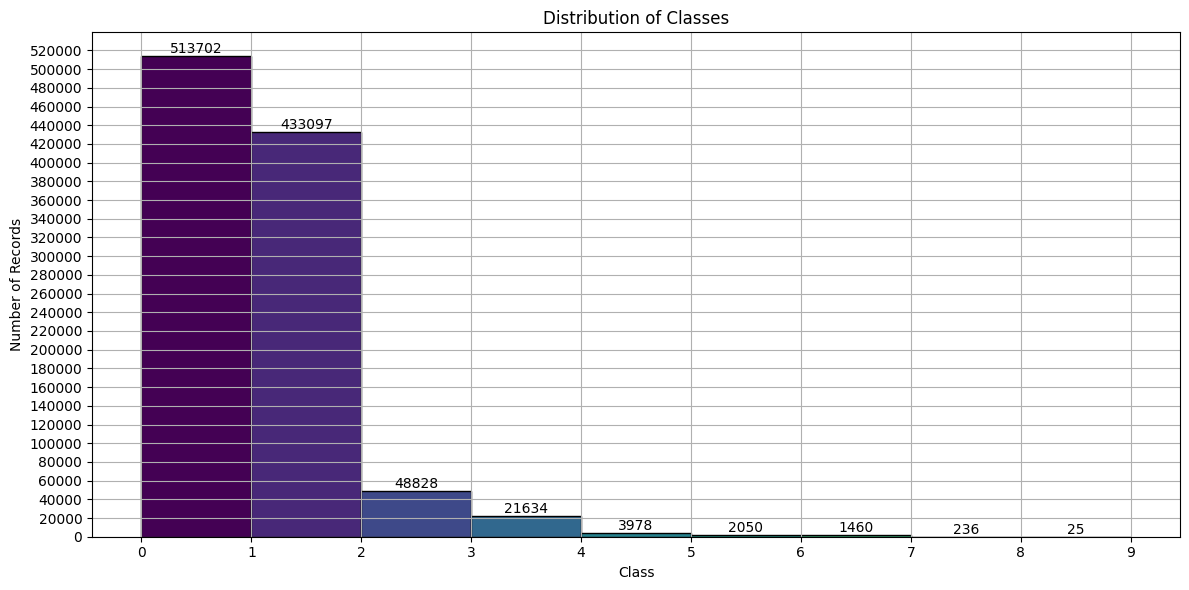

In [6]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(12, 6))

# Create histogram with better visibility and annotations
n, bins, patches = plt.hist(DF["CLASS"], bins=9, edgecolor="black")

# Add color to bars based on height
for bin, patch in zip(bins, patches):
    patch.set_facecolor(plt.cm.viridis(bin / max(bins)))

# Add annotations to each bar
for count, bin in zip(n, range(len(bins)-1)):
    plt.text(bins[bin] + (bins[bin+1] - bins[bin]) / 2, count, f'{int(count)}', ha='center', va='bottom')

# Add a grid, title, and labels
plt.grid(True)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Number of Records')

# Format the x-axis and y-axis ticks for better readability
plt.xticks(ticks=bins)
plt.yticks(ticks=range(0, int(max(n)) + 10000, 20000))

# Show the plot with improvements
plt.tight_layout()
plt.show()


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, stratify = Y)

In [8]:
clf = tree.DecisionTreeClassifier(criterion='gini')

In [9]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [10]:
Y_train_pred = clf.predict(X_train)

In [11]:
def print_confusion_matrix(confusion_matrix,class_names,figsize=(5,3),fontsize=10):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names, )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

#Names of the classes
classNames = ["Nothing", "One pair", "Two pairs", "Three of a kind", "Straight", "Flush", "Full house", "Four of a kind", "Straight flush", "Royal flush"]

In [12]:
#Confusion matrix
print("Confusion matrix: ")
cm = confusion_matrix(Y_train_pred, Y_train)
print(cm)

Confusion matrix: 
[[359591      0      0      0      0      0      0      0      0      0]
 [     0 303168      0      0      0      0      0      0      0      0]
 [     0      0  34179      0      0      0      0      0      0      0]
 [     0      0      0  15144      0      0      0      0      0      0]
 [     0      0      0      0   2785      0      0      0      0      0]
 [     0      0      0      0      0   1435      0      0      0      0]
 [     0      0      0      0      0      0   1022      0      0      0]
 [     0      0      0      0      0      0      0    165      0      0]
 [     0      0      0      0      0      0      0      0     12      0]
 [     0      0      0      0      0      0      0      0      0      6]]


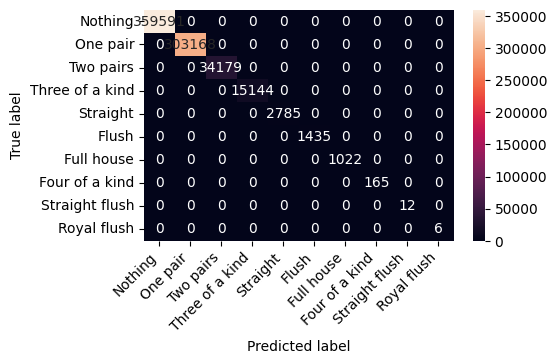

In [13]:
#A better figure representation of the confusion matrix
print_confusion_matrix(confusion_matrix(Y_train_pred, Y_train), classNames)

In [14]:
accuracy(cm)

1.0

In [15]:
Training_error = 1 - accuracy(cm)
print("Training Error is:", Training_error)

Training Error is: 0.0


In [16]:
Y_test_pred = clf.predict(X_test)
cm2 = confusion_matrix(Y_test_pred, Y_test)

Confusion matrix: 
[[108937  39196   1733    523     91    392     14      1      0      0]
 [ 41500  77220   7741   2886    634     95    100      9      4      0]
 [  2079   8875   4461    469     88      0    118     12      0      0]
 [   749   3480    458   2405     71      2    125     27      0      0]
 [   126    810     95     51    299      0      2      0      1      1]
 [   707    153      6      0      1    124      0      0      0      1]
 [    11    164    139    131      2      0     71      2      0      0]
 [     1     25     15     25      2      0      8     20      0      0]
 [     0      5      1      0      3      0      0      0      0      0]
 [     1      1      0      0      2      2      0      0      0      0]]


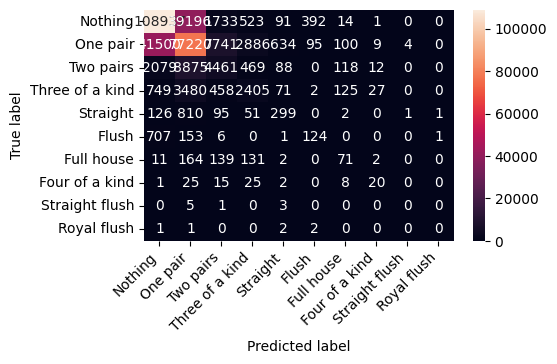

In [17]:
#Confusion matrix
print("Confusion matrix: ")
print(cm2)
print_confusion_matrix(cm2, classNames)

In [18]:
accuracy(cm2)
Testing_error = 1 - accuracy(cm2)
print("Testing Error is:", Testing_error)

Testing Error is: 0.3706175224306755


In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
gnb = GaussianNB()

# Training the classifier
gnb.fit(X_train_scaled, Y_train)

# Making predictions
Y_pred = gnb.predict(X_test_scaled)

# Calculating the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)

print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 50.12%


Confusion matrix: 
[[154111 129929  14649   6490   1193    615    438     71      5      2]
 [     0      0      0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      0      0]]


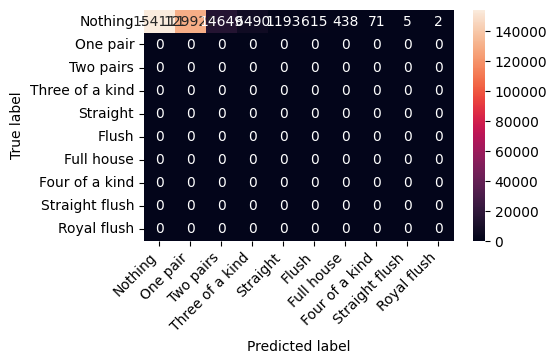

In [21]:
cm4 = confusion_matrix(Y_pred, Y_test)
#Confusion matrix
print("Confusion matrix: ")
print(cm4)
print_confusion_matrix(cm4, classNames)

In [22]:
print("Training dataset shape: ", X_train.shape, "\nTesting dataset shape: ", X_test.shape)

Training dataset shape:  (717507, 10) 
Testing dataset shape:  (307503, 10)


In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
clfANN = MLPClassifier(activation = 'relu', hidden_layer_sizes=(100))

In [32]:
clfANN.fit(X_train_scaled, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=100)

In [33]:
# Predicting using the scaled test data
Y_predictions = clfANN.predict(X_test_scaled)

Confusion matrix: 
[[154079      5      0      0    784      0      0      0      0      0]
 [    26 129898    374      0      9      0      0      0      0      0]
 [     0      2  13753    107      0      0      0      0      0      0]
 [     0      0    522   6372      0      0    158     71      0      0]
 [     6     24      0      0    400      0      0      0      0      0]
 [     0      0      0      0      0    614      0      0      2      2]
 [     0      0      0      6      0      0    280      0      0      0]
 [     0      0      0      5      0      0      0      0      0      0]
 [     0      0      0      0      0      1      0      0      3      0]
 [     0      0      0      0      0      0      0      0      0      0]]


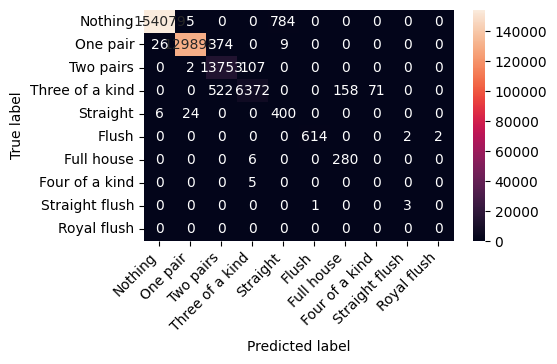

In [34]:
cm3 = confusion_matrix(Y_predictions, Y_test)
print("Confusion matrix: ")
print(cm3)
print_confusion_matrix(cm3, classNames)

In [35]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [36]:
Accuracy = 100*(accuracy(cm3))
print("Accuracy =", Accuracy)

Accuracy = 99.31577903305009


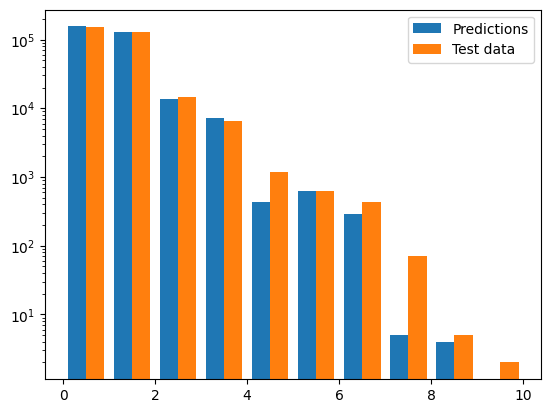

In [37]:
#Check what classes the model is predicting
import matplotlib.pyplot as plt
import numpy as np
plt.hist((np.reshape(Y_predictions,(Y_test.shape[0],)),Y_test),bins=[0,1,2,3,4,5,6,7,8,9,10],log=True)
plt.legend(labels=('Predictions','Test data'))
plt.show()